In [1]:
# kaggleのAPIを使えるようにする
from google.colab import files
from IPython.display import clear_output
from google.colab import drive

drive.mount('/content/drive')
# %cd /content/drive/MyDrive/

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

!kaggle competitions download -c h-and-m-personalized-fashion-recommendations
!unzip h-and-m-personalized-fashion-recommendations.zip
clear_output()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
sample_sub.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [ ]:
first_visit_user_list = list(set(list(customers["customer_id"].unique())) - set(list(transactions["customer_id"].unique())))

In [1]:
from google.colab import files
from IPython.display import clear_output
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/merged_df.csv", dtype={"article_id": str})
n_articles = df["article_id"].nunique()
print("number articles", n_articles)
df.head()

number articles 104547


,t_dat,customer_id,article_id,price,age,customer_sex,item_sex,mean_age,median_age,min_age,max_age,colour_group_name,section_name,graphical_appearance_name,perceived_colour_master_name,department_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,24.0,woman,woman,32.998195,32.998195,19.0,68.0,Black,Womens Lingerie,Solid,Black,Expressive Lingerie
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,24.0,woman,woman,34.475059,34.475059,17.0,68.0,Light Pink,Womens Lingerie,Solid,Pink,Casual Lingerie
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,32.0,woman,devided,33.404762,33.404762,20.0,60.0,Pink,Divided Selected,Melange,Pink,Tops Knitwear DS
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,32.0,woman,woman,35.399024,35.399024,18.0,90.0,Pink,Womens Everyday Collection,Melange,Pink,Campaigns
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,32.0,woman,woman,37.326814,37.326814,18.0,80.0,Dark Green,Womens Everyday Collection,Melange,Green,Campaigns


In [3]:
df["t_dat"] = pd.to_datetime(df["t_dat"])
df["t_dat"].max()

Timestamp('2020-09-22 00:00:00')

In [4]:
active_articles = df.groupby("article_id")["t_dat"].max().reset_index()
active_articles = active_articles[active_articles["t_dat"] >= "2019-09-01"].reset_index()
active_articles.shape

(72581, 3)

In [5]:
df = df[df["article_id"].isin(active_articles["article_id"])].reset_index(drop=True)
df.shape

(29634404, 16)

In [6]:
df["week"] = (df["t_dat"].max() - df["t_dat"]).dt.days // 7
df["week"].value_counts()

65     620104
13     549443
42     518403
12     517428
64     508664
        ...  
93     174190
102    164298
104    163143
97     162580
94     152807
Name: week, Length: 105, dtype: int64

In [7]:
df.head()

,t_dat,customer_id,article_id,price,age,customer_sex,item_sex,mean_age,median_age,min_age,max_age,colour_group_name,section_name,graphical_appearance_name,perceived_colour_master_name,department_name,week
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,24.0,woman,woman,34.475059,34.475059,17.0,68.0,Light Pink,Womens Lingerie,Solid,Pink,Casual Lingerie,104
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,32.0,woman,woman,35.399024,35.399024,18.0,90.0,Pink,Womens Everyday Collection,Melange,Pink,Campaigns,104
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,32.0,woman,woman,37.326814,37.326814,18.0,80.0,Dark Green,Womens Everyday Collection,Melange,Green,Campaigns,104
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687001,0.016932,32.0,woman,woman,35.442697,35.442697,18.0,90.0,Dark Grey,Womens Everyday Collection,Melange,Grey,Campaigns,104
4,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0501323011,0.053373,29.0,woman,woman,37.626424,37.626424,18.0,75.0,Black,Womens Tailoring,Solid,Black,Trouser,104


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


article_ids = np.concatenate([["placeholder"], np.unique(df["article_id"].values)])
customer_sex = np.concatenate([["placeholder"], np.unique(df["customer_sex"].values)])
item_sex = np.concatenate([["placeholder"], np.unique(df["item_sex"].values)])
item_color = np.concatenate([["placeholder"], np.unique(df["colour_group_name"].values)])
section_name = np.concatenate([["placeholder"], np.unique(df["section_name"].values)])
graphical_appearance_name = np.concatenate([["placeholder"], np.unique(df["graphical_appearance_name"].values)])
perceived_colour_master_name = np.concatenate([["placeholder"], np.unique(df["perceived_colour_master_name"].values)])
department_name = np.concatenate([["placeholder"], np.unique(df["department_name"].values)])

le_article = LabelEncoder()
le_customer_sex = LabelEncoder()
le_item_sex = LabelEncoder()
le_item_color = LabelEncoder()
le_section_name = LabelEncoder()
le_graphical_appearance_name = LabelEncoder()
le_perceived_colour_master_name = LabelEncoder()
le_department_name = LabelEncoder()

le_article.fit(article_ids)
le_customer_sex.fit(customer_sex)
le_item_sex.fit(item_sex)
le_item_color.fit(item_color)
le_section_name.fit(section_name)
le_graphical_appearance_name.fit(graphical_appearance_name)
le_perceived_colour_master_name.fit(perceived_colour_master_name)
le_department_name.fit(department_name)

df["article_id"] = le_article.transform(df["article_id"])
df["customer_sex"] = le_customer_sex.transform(df["customer_sex"])
df["item_sex"] = le_item_sex.transform(df["item_sex"])
df["colour_group_name"] = le_item_color.transform(df["colour_group_name"])
df["section_name"] = le_section_name.transform(df["section_name"])
df["graphical_appearance_name"] = le_graphical_appearance_name.transform(df["graphical_appearance_name"])
df["perceived_colour_master_name"] = le_perceived_colour_master_name.transform(df["perceived_colour_master_name"])
df["department_name"] = le_department_name.transform(df["department_name"])

del le_customer_sex, le_item_sex, le_item_color
del customer_sex, item_sex, item_color

In [ ]:
WEEK_HIST_MAX = 75

agg_param = {"article_id": list, 
                      "week": list, 
                      "mean_age": list, 
                      # "age": "min",
                      "price": list, 
                      "customer_sex": "min", 
                      "item_sex": list,
                      "colour_group_name": list,
                      # "desc_mean": list,
                      "section_name": list,
                      "graphical_appearance_name": list,
                      "perceived_colour_master_name": list,
                      "department_name": list,
             }

def create_dataset(df, week):
    hist_df = df[(df["week"] > week) & (df["week"] <= week + WEEK_HIST_MAX)]
    # hist_df = df[(df["week"] > week)]
    # 元のやつ
    # hist_df = hist_df.groupby("customer_id").agg({"article_id": list, "week": list}).reset_index()
    hist_df = hist_df.groupby("customer_id").agg(agg_param).reset_index()
    hist_df.rename(columns={"week": 'week_history'}, inplace=True)
    
    target_df = df[df["week"] == week]
    # 元のやつ
    # target_df = target_df.groupby("customer_id").agg({"article_id": list}).reset_index()
    target_df = target_df.groupby("customer_id").agg({"article_id": list}).reset_index()
    target_df.rename(columns={"article_id": "target"}, inplace=True)
    target_df["week"] = week
    result_df = target_df.merge(hist_df, on="customer_id", how="left")
    del target_df, hist_df
    return result_df

time = list(np.arange(1, 5))
v_week = 0
val_weeks = [v_week]
train_weeks = time


val_df = pd.concat([create_dataset(df, w) for w in val_weeks]).reset_index(drop=True)
train_df = pd.concat([create_dataset(df, w) for w in train_weeks]).reset_index(drop=True)
train_df.fillna({"customer_sex": 10000}, inplace=True)
val_df.fillna({"customer_sex": 10000}, inplace=True)

train_df.shape, val_df.shape

In [ ]:
train_df.head()

In [ ]:
train_df.isnull().sum()

In [ ]:
val_df.isnull().sum()

In [ ]:
val_df.head()

In [ ]:
sample_id = train_df.loc[0, "customer_id"]

In [ ]:
train_df[""]

In [ ]:
# 指定した週に購買データが存在しないユーザーリスト
train_tmp = train_df.copy()
train_tmp.fillna({"article_id": 0}, inplace=True)
these_week_no_data_user = list(train_tmp[train_tmp["article_id"] == 0]["customer_id"].unique())
print(len(these_week_no_data_user))

# その中で、購買履歴があるユーザーのみを抽出
hist_exit_users = list(set(these_week_no_data_user) - set(first_visit_user_list))
print(len(hist_exit_users))

149321
149321


In [ ]:
train_df.set_index("customer_id", inplace=True)

In [ ]:
for name in [sample_id]:
  tmp = a[a["customer_id"] == name].reset_index(drop=True)
  for col in update_cols:
    print(tmp[col])
    train_df.loc[name, col] = tmp[col][0]

0    [4991, 8050, 29634, 898, 898, 30175, 30181, 61...
Name: article_id, dtype: object


ValueError: ignored

In [ ]:
train_df.loc[sample_id, :]

target                          [46435]
week                                  1
article_id                          NaN
week_history                        NaN
mean_age                            NaN
price                               NaN
customer_sex                    10000.0
item_sex                            NaN
colour_group_name                   NaN
section_name                        NaN
graphical_appearance_name           NaN
perceived_colour_master_name        NaN
department_name                     NaN
Name: 000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318, dtype: object

In [ ]:
a = df[df["customer_id"].isin(hist_exit_users)].groupby("customer_id").agg(agg_param).reset_index()
a.head()

,customer_id,article_id,week,mean_age,price,customer_sex,item_sex,colour_group_name,section_name,graphical_appearance_name,perceived_colour_master_name,department_name
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"[12669, 70, 12977, 23734, 7137, 7137, 10312, 3...","[90, 90, 90, 72, 69, 69, 60, 60, 52, 51, 51, 4...","[44.775510204081634, 39.09739130434782, 39.488...","[0.0440508474576271, 0.0355762711864406, 0.030...",4,"[0, 2, 0, 0, 5, 5, 5, 1, 5, 5, 5, 0, 0, 5, 5, ...","[5, 1, 5, 24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[24, 39, 24, 22, 52, 52, 52, 26, 44, 52, 52, 5...","[25, 25, 25, 0, 25, 25, 26, 7, 25, 25, 25, 25,...","[2, 1, 2, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[225, 79, 115, 112, 188, 188, 33, 45, 204, 188..."
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[4991, 8050, 29634, 898, 898, 30175, 30181, 61...","[104, 81, 33, 33, 33, 24, 24, 22, 22, 22, 22, ...","[34.475059382422806, 33.856512141280355, 33.62...","[0.0304915254237288, 0.0135423728813559, 0.025...",4,"[5, 5, 5, 5, 5, 2, 2, 1, 5, 5, 5, 5, 5, 2, 2, 4]","[24, 20, 1, 1, 1, 1, 17, 40, 0, 20, 20, 16, 16...","[46, 42, 51, 51, 51, 37, 37, 12, 52, 42, 42, 4...","[25, 26, 25, 25, 25, 25, 15, 25, 0, 21, 21, 26...","[12, 2, 1, 1, 1, 1, 6, 12, 0, 2, 2, 7, 7, 1, 7...","[42, 33, 191, 191, 191, 122, 122, 202, 173, 20..."
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,"[31753, 30082, 27899, 43969, 28802, 1802]","[68, 68, 48, 48, 1, 1]","[32.93890977443609, 35.14959785522788, 31.5612...","[0.0254067796610169, 0.0169322033898305, 0.025...",0,"[5, 5, 1, 1, 1, 1]","[6, 6, 0, 1, 1, 2]","[51, 51, 11, 11, 12, 12]","[25, 21, 25, 25, 25, 25]","[5, 5, 0, 1, 1, 2]","[191, 191, 27, 27, 206, 206]"
3,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,"[8118, 28489, 5054, 9718, 9718, 66360, 66360]","[87, 87, 87, 87, 87, 4, 4]","[39.22431668237512, 33.318077803203664, 38.661...","[0.0304915254237288, 0.0304915254237288, 0.030...",1,"[2, 2, 2, 2, 2, 5, 5]","[1, 1, 11, 1, 1, 23, 23]","[38, 38, 38, 38, 38, 46, 46]","[25, 25, 26, 25, 25, 25, 25]","[1, 1, 13, 1, 1, 11, 11]","[130, 74, 130, 130, 130, 43, 43]"
4,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,"[6037, 12710, 6465, 23468, 21029, 12787, 9534,...","[103, 98, 95, 92, 92, 92, 92, 81, 81, 69, 69, ...","[33.788022064617806, 39.24201474201474, 35.556...","[0.0338813559322033, 0.0338813559322033, 0.033...",4,"[2, 5, 5, 1, 2, 2, 2, 1, 4, 5, 1, 5, 5, 1, 1, ...","[1, 5, 1, 1, 0, 42, 47, 1, 1, 16, 0, 1, 14, 2,...","[38, 42, 44, 12, 38, 7, 5, 11, 27, 44, 12, 52,...","[25, 4, 25, 25, 25, 4, 22, 25, 15, 25, 25, 25,...","[1, 2, 1, 1, 0, 13, 16, 1, 1, 7, 0, 1, 9, 2, 1...","[28, 33, 204, 56, 74, 163, 83, 27, 127, 54, 20..."


In [ ]:
tmp = a[a["customer_id"] == sample_id].reset_index(drop=True)

In [ ]:
train_df.loc[name, "article_id"] = "a"
train_df.loc[name, "article_id"] = tmp["article_id"][0]

AttributeError: ignored

In [ ]:
for col in update_cols:
  print(a[a["customer_id"] == sample_id].loc[:, col])

1    [4991, 8050, 29634, 898, 898, 30175, 30181, 61...
Name: article_id, dtype: object
1    [104, 81, 33, 33, 33, 24, 24, 22, 22, 22, 22, ...
Name: week, dtype: object
1    [34.475059382422806, 33.856512141280355, 33.62...
Name: mean_age, dtype: object
1    [0.0304915254237288, 0.0135423728813559, 0.025...
Name: price, dtype: object
1    4
Name: customer_sex, dtype: int64
1    [5, 5, 5, 5, 5, 2, 2, 1, 5, 5, 5, 5, 5, 2, 2, 4]
Name: item_sex, dtype: object
1    [24, 20, 1, 1, 1, 1, 17, 40, 0, 20, 20, 16, 16...
Name: colour_group_name, dtype: object
1    [46, 42, 51, 51, 51, 37, 37, 12, 52, 42, 42, 4...
Name: section_name, dtype: object
1    [25, 26, 25, 25, 25, 25, 15, 25, 0, 21, 21, 26...
Name: graphical_appearance_name, dtype: object
1    [12, 2, 1, 1, 1, 1, 6, 12, 0, 2, 2, 7, 7, 1, 7...
Name: perceived_colour_master_name, dtype: object
1    [42, 33, 191, 191, 191, 122, 122, 202, 173, 20...
Name: department_name, dtype: object


In [ ]:
update_cols = list(a.columns)[1:]

**<span style="color:#023e8a;"> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span style="color:#023e8a;"> Article data description: </span>**

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

In [ ]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


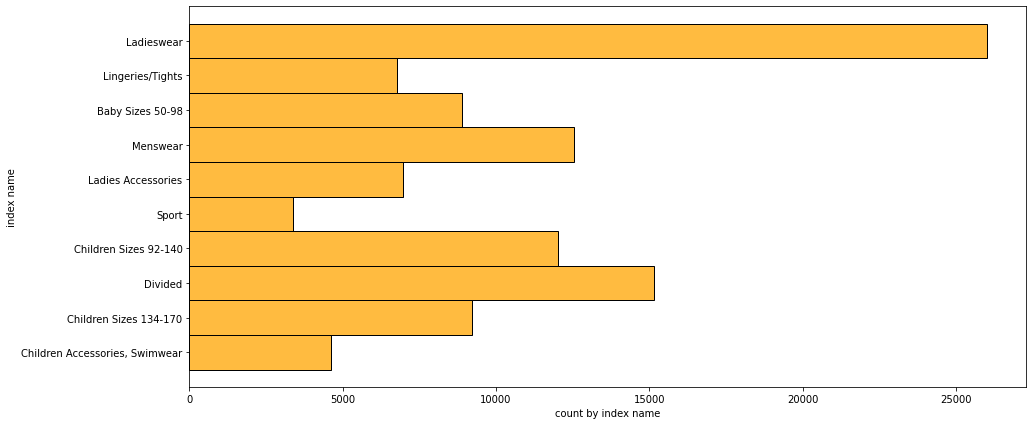

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

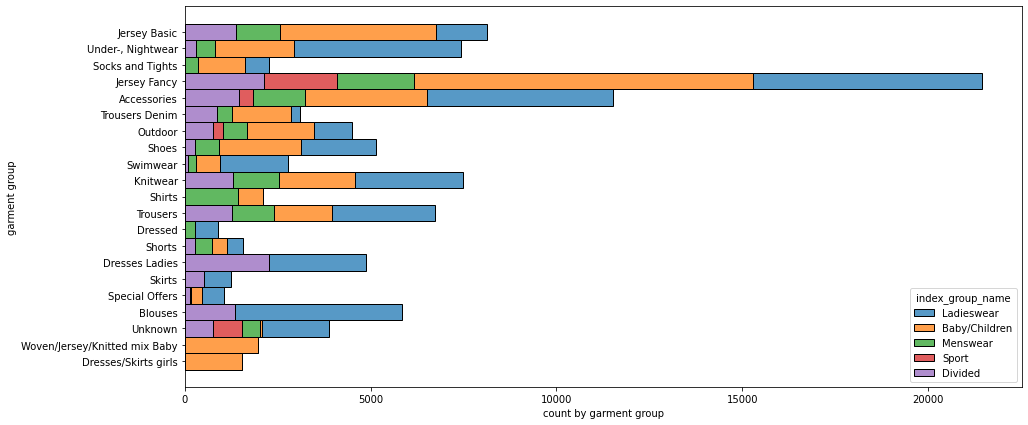

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [ ]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [ ]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


**<span style="color:#023e8a;"> Customers data description: </span>**

> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `FN` **<span style="color:#023e8a;">: 1 or missed </span>**  
> `Active` **<span style="color:#023e8a;">: 1 or missed</span>**  
> `club_member_status` **<span style="color:#023e8a;">: Status in club</span>**  
> `fashion_news_frequency` **<span style="color:#023e8a;">: How often H&M may send news to customer</span>**  
> `age` **<span style="color:#023e8a;">: The current age</span>**  
> `postal_code` **<span style="color:#023e8a;">: Postal code of customer</span>**  

In [ ]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers.shape[0] - customers['customer_id'].nunique()

0

In [ ]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [ ]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


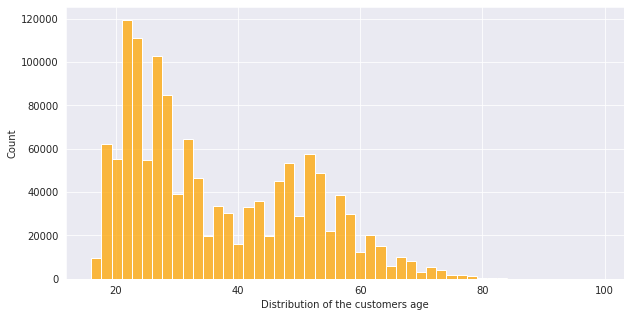

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

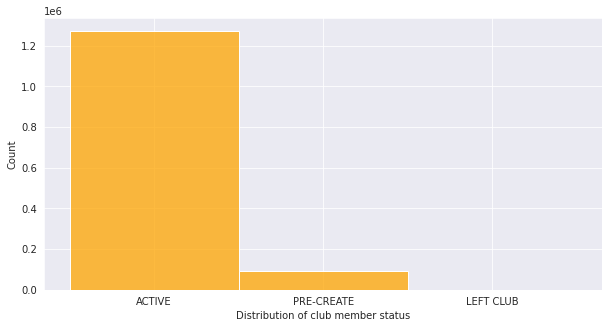

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()


In [ ]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [ ]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [ ]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

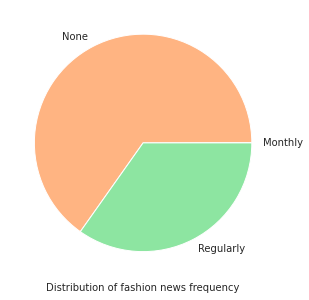

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

**<span style="color:#023e8a;"> Transactions data description: </span>**

> `t_dat` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span style="color:#023e8a;">: Price of purchase</span>**  
> `sales_channel_id` **<span style="color:#023e8a;">: 1 or 2</span>**  

In [ ]:
transactions.head()


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


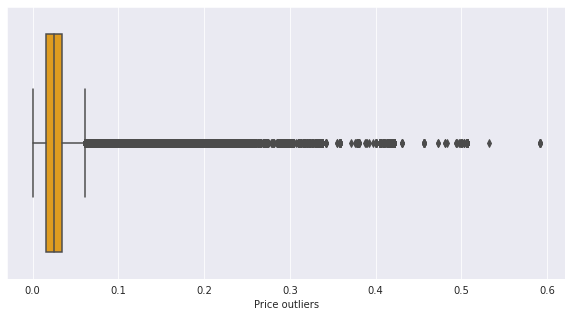

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

In [ ]:
transactions_byid = transactions.groupby('customer_id').count()

In [ ]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

In [ ]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [ ]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

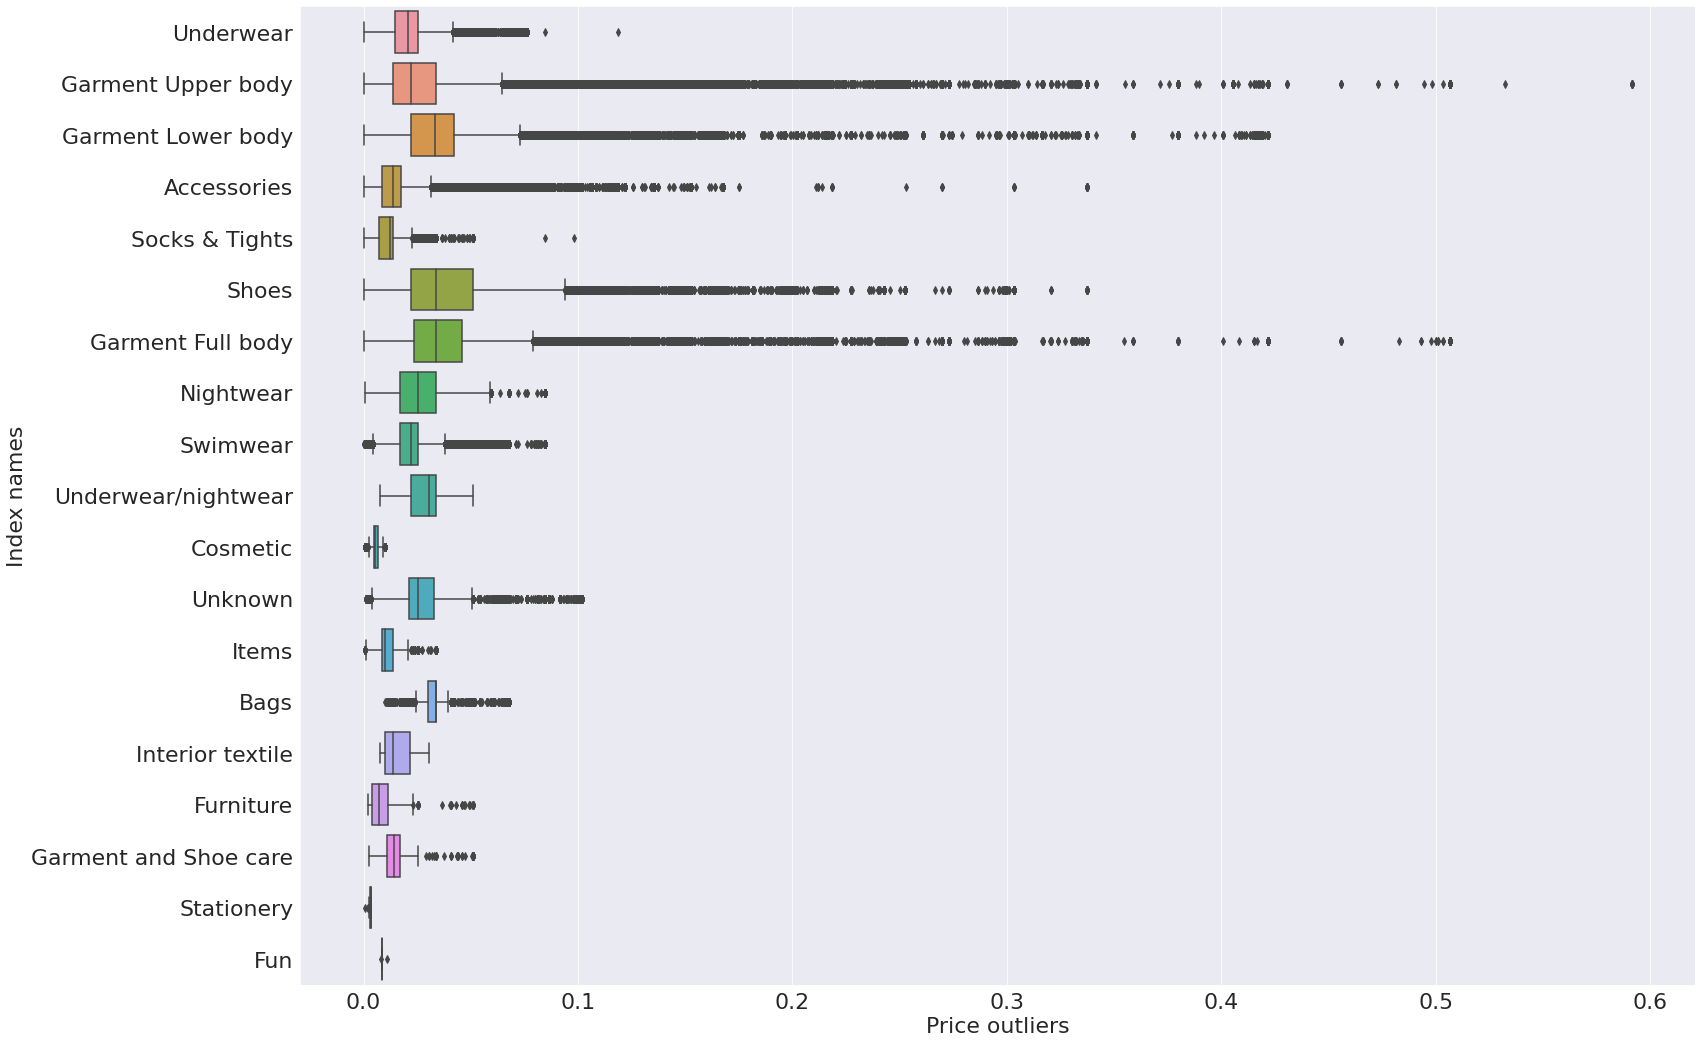

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

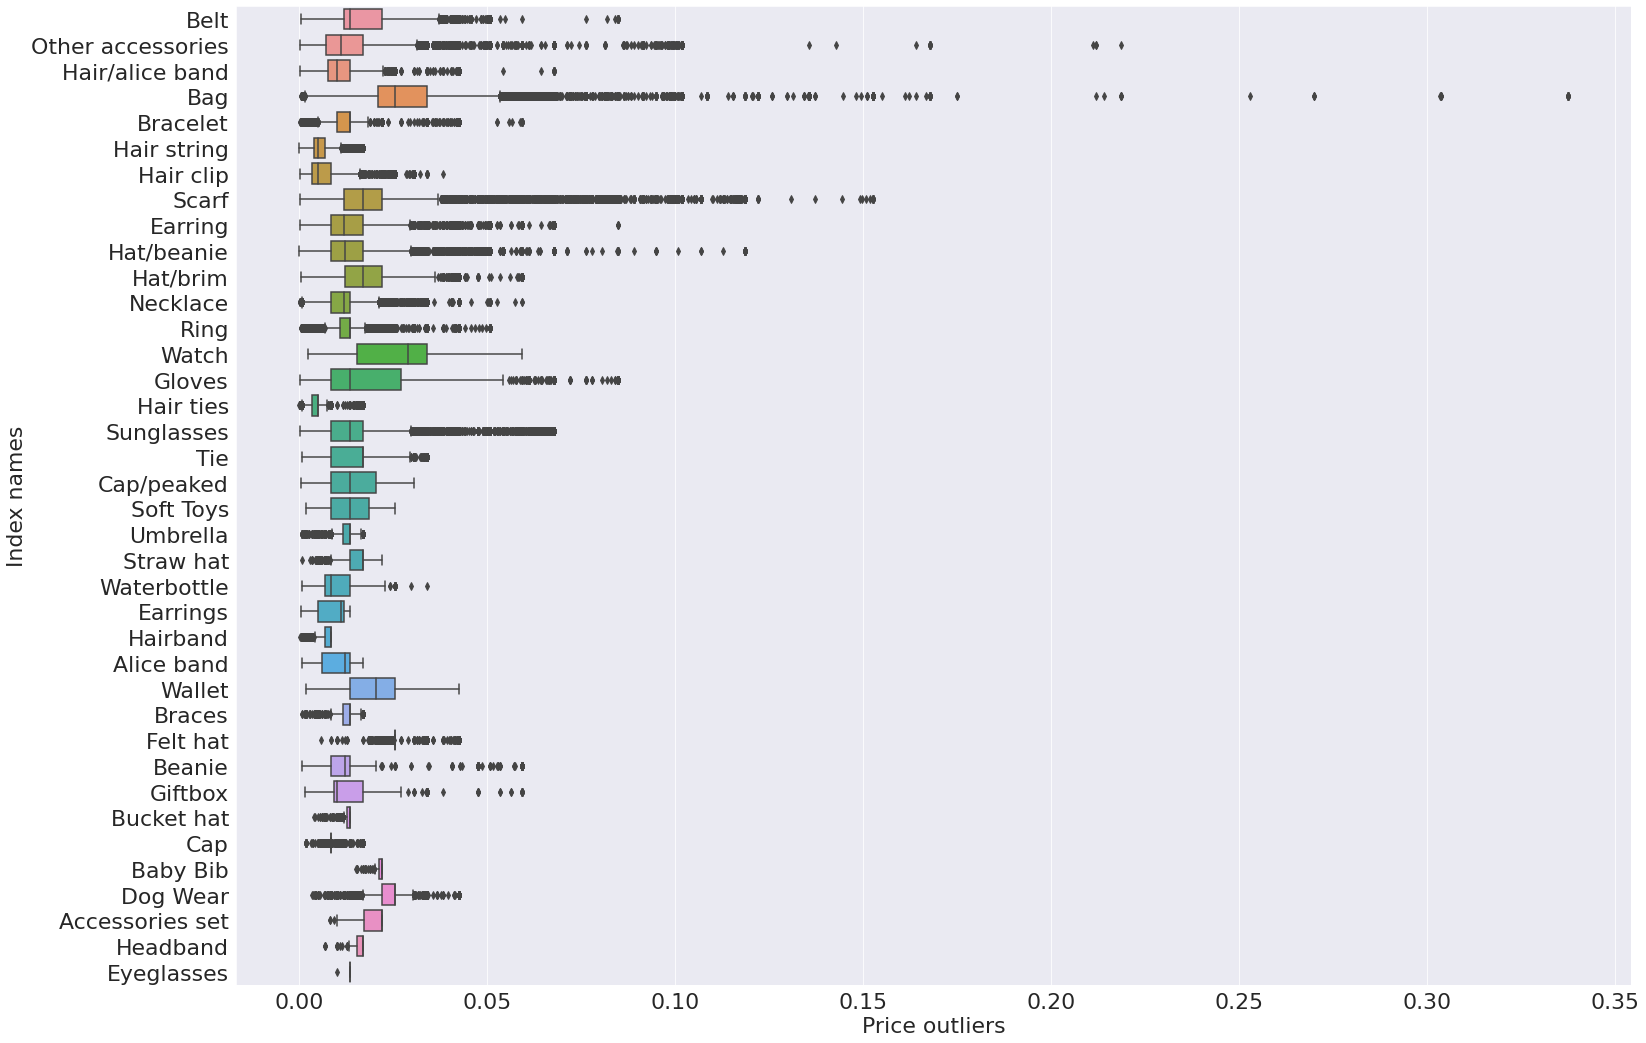

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

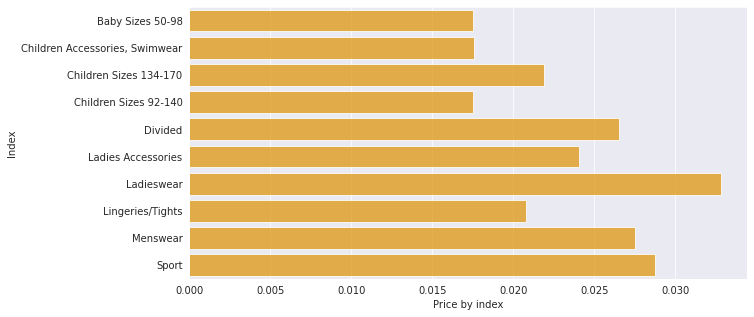

In [ ]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

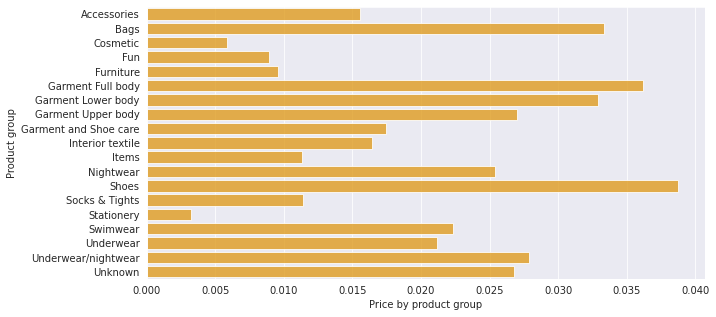

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

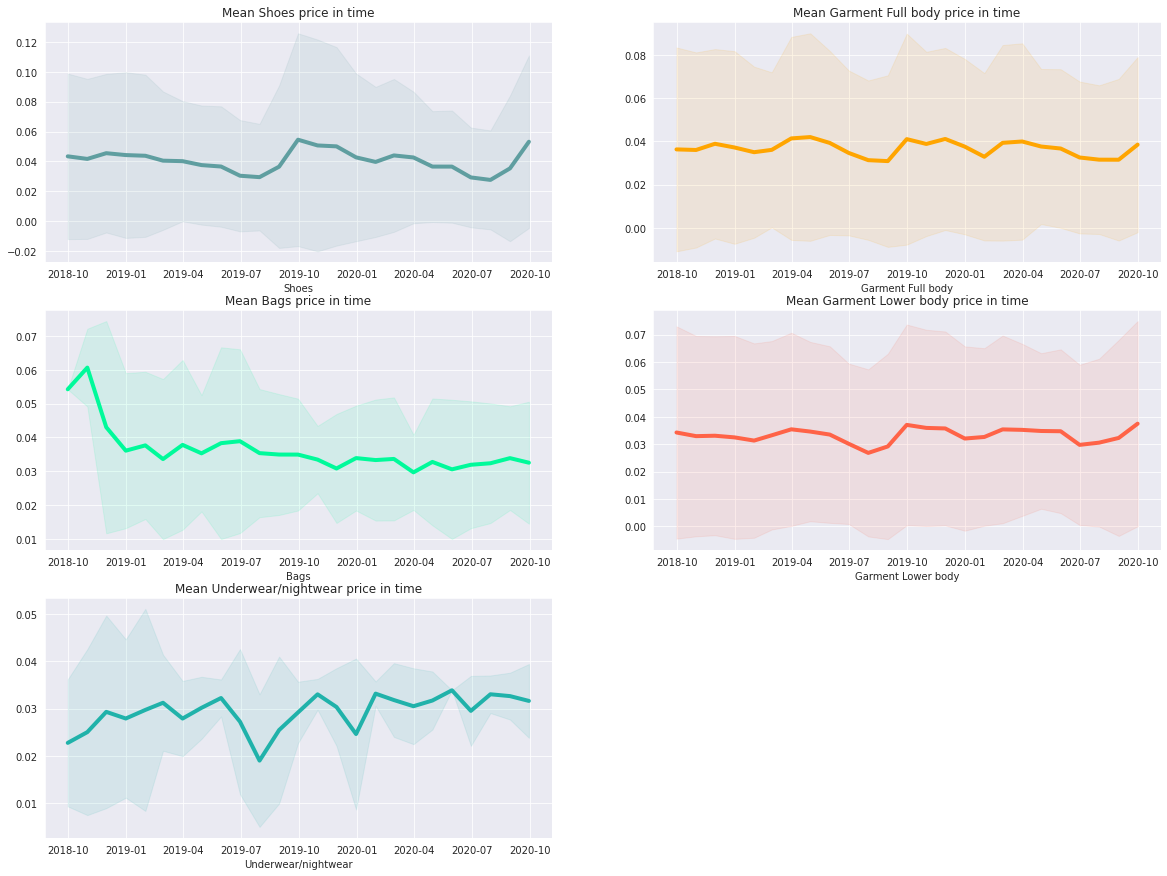

In [ ]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


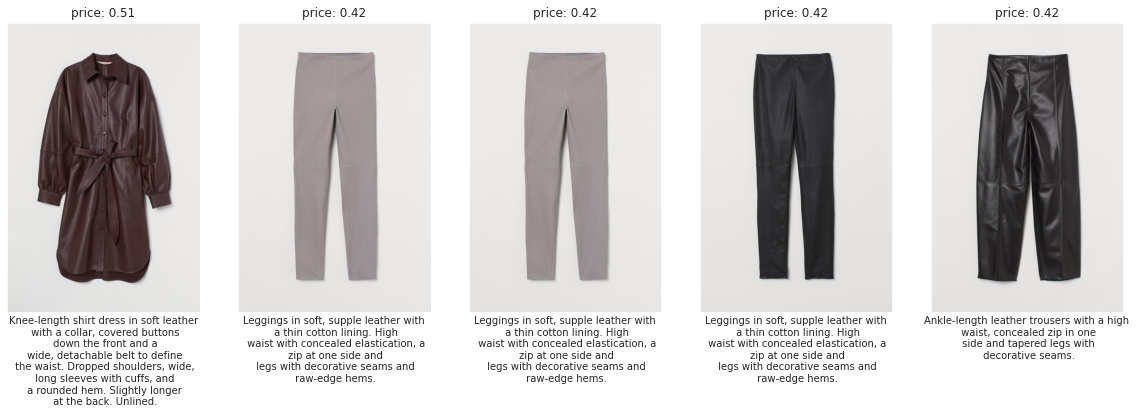

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'./images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


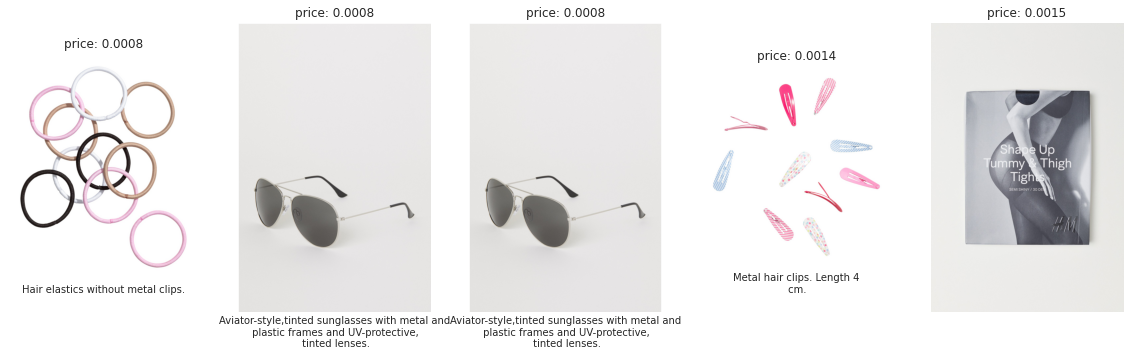

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'./images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()